In [29]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

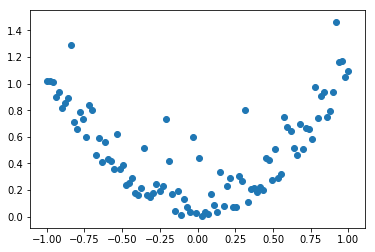

In [30]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + torch.rand(x.size())*torch.rand(x.size())*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [31]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [32]:
net = Net(n_feature=1, n_hidden=18, n_output=1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()
print(net)

######################################################################

net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 1)
    )
print(net1)

optimizer = torch.optim.SGD(net1.parameters(), lr=0.4)
loss_func = torch.nn.MSELoss()

Net(
  (hidden): Linear(in_features=1, out_features=18, bias=True)
  (predict): Linear(in_features=18, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)


In [33]:
plt.ion()

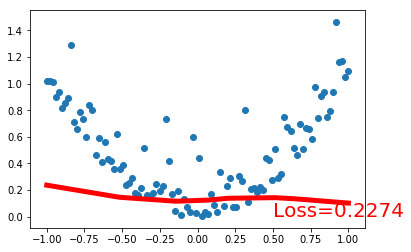

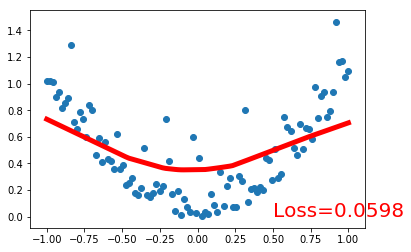

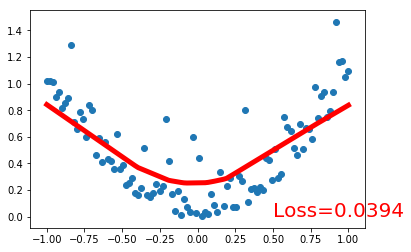

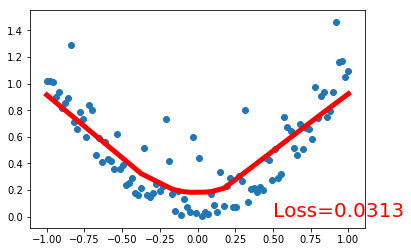

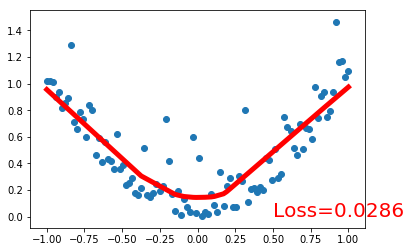

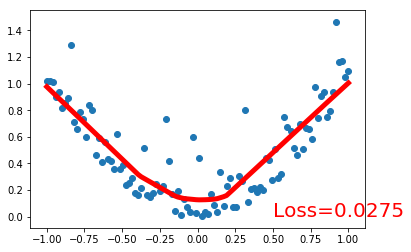

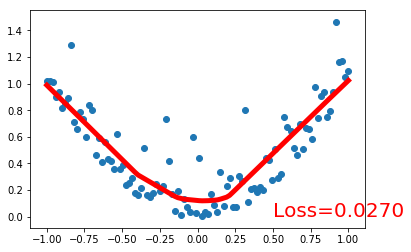

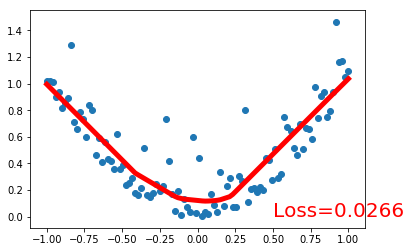

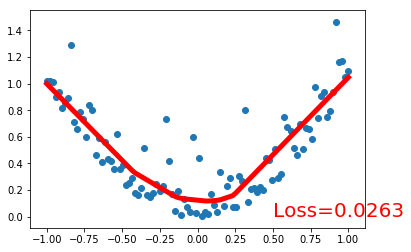

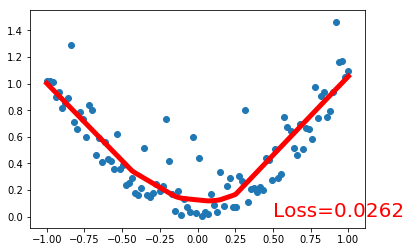

In [34]:
for t in range(100):
    prediction = net1(x)

    loss = loss_func(prediction, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

In [45]:
def save():
    torch.save(net1, 'net.pkl')
    torch.save(net1.state_dict(), 'net_params.pkl')
    
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction2 = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction2.data.numpy(), 'r-', lw=5)
    
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 20),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction3 = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction3.data.numpy(), 'r-', lw=5)
    plt.show()

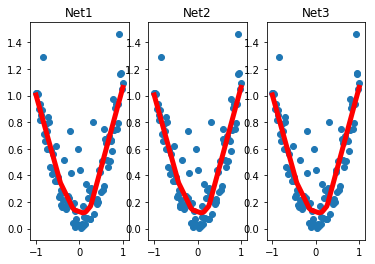

In [46]:
save()
restore_net()
restore_params()